This is an attempt to derive a model for accounting for DMC (Dense multipath components)

@ARTICLE{6174464, 
author={Bamba, A. and Joseph, W. and Andersen, J.B. and Tanghe, E. and Vermeeren, G. and Plets, D. and Nielsen, J.O. and Martens, L.}, 
journal={Electromagnetic Compatibility, IEEE Transactions on}, 
title={Experimental Assessment of Specific Absorption Rate Using Room Electromagnetics}, 
year={2012}, 
month={Aug}, 
volume={54}, 
number={4}, 
pages={747-757}, 
keywords={MIMO communication;UHF radio propagation;antenna theory;biological effects of microwaves;electromagnetic wave absorption;electromagnetic wave scattering;indoor radio;measurement systems;reverberation;virtual instrumentation;wireless channels;SAR;absorption cross-section;antenna characteristics;closed room environment;diffuse energy properties;diffuse scattering;frequency 2.3 GHz;human exposure;lossy cavity;measurement system;measurement-based method;reverberation time assessment;room electromagnetics;specific absorption rate;virtual multiple-input multiple-output channel system;Absorption;Antenna measurements;Arrays;Electromagnetics;Frequency measurement;Reverberation;Time measurement;Absorption cross section (ACS);diffuse scattering;power density;reverberation time;room electromagnetics;specific absorption rate (SAR)}, 
doi={10.1109/TEMC.2012.2189572}, 
ISSN={0018-9375},}

$$S(t) = V \frac{dW}{dt}+ \frac{c \eta A}{4} W$$

@ARTICLE{6275475, 
author={Pedersen, T. and Steinbock, G. and Fleury, B.H.}, 
journal={Antennas and Propagation, IEEE Transactions on}, 
title={Modeling of Reverberant Radio Channels Using Propagation Graphs}, 
year={2012}, 
month={Dec}, 
volume={60}, 
number={12}, 
pages={5978-5988}, 
keywords={avalanche diodes;delays;wireless channels;avalanche effect;closed-form expression;delay;exponential power decay;propagation graphs;reverberant radio channels;signal components;Computational modeling;Delay;Receivers;Scattering;Transfer functions;Transmitters;Vectors;Channel impulse response;indoor radio channels;multiple scattering;radio channels;reverberation;signal flow graphs}, 
doi={10.1109/TAP.2012.2214192}, 
ISSN={0018-926X},}

$W$ is the Energy density ($J/m^3$)

@ARTICLE{6509986, 
author={Steinbock, G. and Pedersen, T. and Fleury, B.H. and Wei Wang and Raulefs, R.}, 
journal={Antennas and Propagation, IEEE Transactions on}, 
title={Distance Dependent Model for the Delay Power Spectrum of In-room Radio Channels}, 
year={2013}, 
month={Aug}, 
volume={61}, 
number={8}, 
pages={4327-4340}, 
keywords={mean square error methods;radio receivers;radio transmitters;reverberation chambers;wireless channels;Dirac delta function;closed rooms;delay power spectrum;distance dependent model;distance dependent trends;exponentially decaying function;in-room radio channels;inverse distance power law;kurtosis;mean delay;path loss;propagation time;range based radio localization;receiver;reverberant component;root mean squared delay spread;transmitter;Delay power spectrum;delay spread;distance- dependent channel model;indoor environments;mean delay;multipath propagation;radio localization;reverberation}, 
doi={10.1109/TAP.2013.2260513}, 
ISSN={0018-926X},}

In [1]:
from pylayers.gis.layout import *
from pylayers.antprop.slab import *
%matplotlib  inline

Layout:Mayavi is not installed


In [2]:
L=Layout('WHERE1.ini')

In [3]:
L.build(convexify=False)

merge
merge
merge
merge
merge
merge
merge
merge
merge
merge
merge
merge


# Sabine's Model 

$$\tau_r = \frac{4V}{cA\eta}$$

If the absorption coefficient is 0 (PEC), the reverberation time is infinite. However if the absorption is total ($\eta=1$), the reverberation time is not 0, unless we take this other formulation:

# Eyring's model 

$$\tau_{g} = -\frac{4V}{cA\lnη(1-\eta)}$$

$$\eta =\frac{\sum_k T_k S_k}{\sum_k S_k}$$

(<matplotlib.figure.Figure at 0x7f20fd8389d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20fd838a90>)

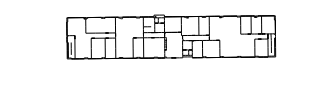

In [4]:
L.showG('s')

In [5]:
C1 = filter(lambda x: x>0, L.Gr.node[4]['cycle'].cycle)

In [6]:
C1

[29, 30, 12, 11, 16, 342, 333, 22, 328, 24, 23, 335, 334]

In [7]:
C = L.Gr.node[4]['cycle']

In [8]:
V,A,eta,tau_sab,tau_eyr=C.reverberation(3,L)

In [9]:
tau_sab

60.770283954121197

In [10]:
tau_eyr

55.757762518528892

In [11]:
eta

0.16030083804912365

In [12]:
V/A

0.73061455847466295

In [13]:
S=C.area

In [14]:
V/A

0.73061455847466295

In [15]:
A = P*3+2*S
V = S*3

NameError: name 'P' is not defined

In [ ]:
print V,A,V/A

In [ ]:
sum(S1)+sum(S2)

In [18]:
sum(S2)

In [19]:
P=L.Gr.node[1]['polyg']

In [20]:
P.length

In [21]:
1+1.5+5+4+5+1.5

In [22]:
L.Gs.node[2]['connect']

In [23]:
L.Gs.pos[-8]

In [24]:
L.Gs.node[2]

In [25]:
L.show3()

In [30]:
L.Gs.node[1]['name']

In [31]:
slp=L.sl['PARTITION']

In [32]:
Lo,Lp=slp.loss0(np.arange(0.7,28,0.01))

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib
`%matplotlib` prevents importing * from pylab and numpy

In [34]:
plot(Lo)

In [35]:
10**(-5/10.)

0.31622776601683794

In [36]:
L.sl

Slab file name     : slabDB.ini
Material file name : matDB.ini
-----------------------------

WINDOW_GLASS : GLASS | [0.003]

PLASTERBOARD_7CM : PLASTER | [0.07]

WALL : BRICK | [0.07]
f(GHz) : [3]
theta (rad) : [ 0.]

AIR : AIR | [0.02]
f(GHz) : [3]
theta (rad) : [ 0.]

WINDOW : GLASS | AIR | GLASS | [0.005, 0.005, 0.005]

METALIC : METAL | [0.1]

PLASTERBOARD_14CM : PLASTER | [0.14]

DOOR : WOOD | [0.03]

FLOOR : REINFORCED_CONCRETE | [0.1]

METAL : METAL | [0.1]
f(GHz) : [3]
theta (rad) : [ 0.]

PARTITION : PLASTER | [0.1]
f(GHz) : [3]
theta (rad) : [ 0.]

CONCRETE_20CM3D : CONCRETE | [0.2]

PLASTERBOARD_10CM : PLASTER | [0.1]

CEIL : REINFORCED_CONCRETE | [0.1]

CONCRETE_6CM3D : CONCRETE | [0.06]

CONCRETE_15CM3D : CONCRETE | [0.15]

3D_WINDOW_GLASS : GLASS | AIR | GLASS | [0.005, 0.005, 0.005]

WALLS : BRICK | [0.15]

WOOD : WOOD | [0.04]
f(GHz) : [3]
theta (rad) : [ 0.]

CONCRETE_7CM3D : CONCRETE | [0.07]

PILLAR : REINFORCED_CONCRETE | [0.3]

ABSORBENT : ABSORBENT | [0.1]

In [43]:
import networkx as nx
import numpy as np

In [44]:
sA=nx.adjacency_matrix(L.Gi)

In [45]:
B=sA.todense()

In [46]:
B.shape

(36, 36)

In [47]:
plt.imshow(B)
plt.colorbar()

In [48]:
I=np.eye(36)

In [49]:
U=(I-B)

In [50]:
import numpy.linalg as la

In [51]:
G=la.inv(U)

In [52]:
u,v=la.eig(G)

In [53]:
plot(u)

/home/uguen/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)

In [54]:
L.Gi.edge[(9,2)][(1,2)]

{'output': {(3, 2): 0.00050222388593930151,
  (3, 2, 1): 0.00050222388593930151,
  (4, 2): 0.8660370411557603,
  (5, 2): 0.86553481726975567}}

In [55]:
len(L.Gi.edges())

132

In [56]:
for e in L.Gi.edges():
    ns1 = e[0][0]
    cy1 = e[0][1]
    ns2 = e[1][0]
    cy2 = e[1][1]
    if cy1==cy2:
    # Reflection
    else:
    # Transmission

    L.Gi[e[0]][e[1]]['weight']=9
    #print ns1,ns2,cy1,cy2

$$\alpha_i(f) = \int_0^{\frac{\pi}{2}}(1-\frac{1}{2}(|\Gamma_{h,i}(\theta,f)|^2+|\Gamma_{v,i}(\theta,f)|^2) \cos(\theta)\sin(\theta) d\theta $$

$$\epsilon_r = 6 $$

In [16]:
sl=L.sl

In [51]:
sl.mat.add(name='CONCRETE-AAU',cval=6,sigma=0.08)
sl.mat.add(name='WOOD-AAU',cval=2.1,sigma=0.05)
sl.mat.add(name='GLASS-AAU',cval=5.5,sigma=0)

In [52]:
sl.mat

Available Material
-------------------
STONE (8)    |epsr|=8.70 sigma (S/m)=3.00
WOOD-AAU (17)    |epsr|=2.10 sigma (S/m)=0.05
CONCRETE (5)    |epsr|=5.50 sigma (S/m)=0.05
PLASTER (3)    |epsr|=8.00 sigma (S/m)=0.04
METAL (-1)    |epsr|=1.41 sigma (S/m)=1000.00
PLATRE-57GHz (10)    |epsr|=3.10 sigma (S/m)=0.00
AIR (1)    |epsr|=1.00 sigma (S/m)=0.00
CONCRETE-METIS-TC1 (11)    |epsr|=6.15 sigma (S/m)=0.00
GLASS (4)    |epsr|=3.80 sigma (S/m)=0.00
WOOD (7)    |epsr|=2.84 sigma (S/m)=0.00
WOOD-METIS-TC1 (12)    |epsr|=1.64 sigma (S/m)=0.00
CONCRETE-AAU (16)    |epsr|=6.00 sigma (S/m)=0.08
GLASS-AAU (18)    |epsr|=5.50 sigma (S/m)=0.00
BRICK (2)    |epsr|=4.10 sigma (S/m)=0.30
SEA_WATER (9)    |epsr|=81.00 sigma (S/m)=4.00
REINFORCED_CONCRETE (6)    |epsr|=8.70 sigma (S/m)=3.00
ABSORBENT (0)    |epsr|=1.00 sigma (S/m)=0.00


In [47]:
wood=sl.mat['WOOD-AAU']
glass= sl.mat['GLASS-AAU']
concrete=sl.mat['CONCRETE-AAU']
metal=sl.mat['METAL']

In [48]:
theta=np.arange(0,np.pi/2,0.01)[None,:]

Hybrid Model For REverberant Indoor Radio Channels Using Rays and Graphs

# Concrete

In [57]:
(3.1+10.6)/2

6.85

In [61]:
Rv,Rh=concrete.R(fGHz=np.r_[6.85],theta=theta)
I = (1-0.5*(abs(Rv)*abs(Rv)+abs(Rh)*abs(Rh)))*np.sin(theta)*np.cos(theta)
a_concrete = np.sum(I[0,:])*(theta[0,1]-theta[0,0])
print a_concrete

0.391912328917


# Glass

In [62]:
Rv,Rh=glass.R(fGHz=np.r_[6.85],theta=theta)
I = (1-0.5*(abs(Rv)*abs(Rv)+abs(Rh)*abs(Rh)))*np.sin(theta)*np.cos(theta)
a_glass = np.sum(I[0,:])*(theta[0,1]-theta[0,0])
print a_glass

0.398163238517


# Wood

In [63]:
Rv,Rh=wood.R(fGHz=np.r_[6.85],theta=theta)
I = (1-0.5*(abs(Rv)*abs(Rv)+abs(Rh)*abs(Rh)))*np.sin(theta)*np.cos(theta)
a_wood = np.sum(I[0,:])*(theta[0,1]-theta[0,0])
print a_wood

0.457571961967


# Metal 

In [64]:
Rv,Rh=metal.R(fGHz=np.r_[6.85],theta=theta)
I = (1-0.5*(abs(Rv)*abs(Rv)+abs(Rh)*abs(Rh)))*np.sin(theta)*np.cos(theta)
a_wood = np.sum(I[0,:])*(theta[0,1]-theta[0,0])
print a_wood

0.0220308927637


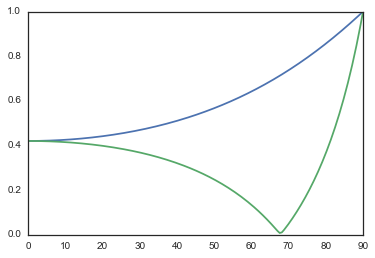

In [40]:
plt.plot(theta[0,:]*180/np.pi,abs(Rv[0,:]))
plt.plot(theta[0,:]*180/np.pi,abs(Rh[0,:]))

In [65]:
ts = np.r_[144.36,18.16,15.79,27.43]
al = np.r_[0.39,0.46,0.4,0]

In [66]:
S = np.sum(ts)

abar = np.sum(ts*al)/S

In [67]:
print abar

0.344949936813


In [68]:
print S

205.74


In [104]:
V1=6.2*9.5*3.5
V2=5.8*8.4*3.1

In [105]:
print V2

151.032


In [106]:
print V2/S

0.734091571887


In [107]:
T = -4*V2/(0.3*S*np.log(1-abar))

In [108]:
print(T)

23.1368286934


In [109]:
V = 22.9*(0.3*S*np.log(1-abar))/(-4)

In [110]:
print V

149.486035698


-20 : 60 
-32 : 120

In [47]:
32-20

12

In [48]:
60

60

$$e^{-\frac{\tau}{T}}$$

$$\frac{-10\tau \log_{10}(e)}{T}$$

In [34]:
c = 10*np.log10(np.e)

In [35]:
print c

4.34294481903


In [36]:
alpha=-12/60.

$$\alpha=\frac{-4.34}{T}$$

In [37]:
T = -c/alpha

In [38]:
print T

21.7147240952
